<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('hd.csv')
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [ ]:
df.shape

(10000, 5)

In [ ]:
df.dtypes

,0
square_feet,float64
num_rooms,int64
age,int64
distance_to_city(km),float64
price,float64


In [ ]:
df.value_counts()

square_feet  num_rooms  age  distance_to_city(km)  price         
3492.629501  6          33   6.563683               611247.849795    1
3474.547213  2          41   13.271162              437332.193120    1
3471.524168  7          66   4.595629               553898.837473    1
3467.828951  5          92   12.202178              458450.484634    1
3467.703103  2          63   1.545414               531039.304530    1
                                                                    ..
500.000000   4          63   5.801148               74524.456951     1
                        34   9.385787               72857.884521     1
             3          76   12.561114             -14286.956405     1
                        2    5.999410               132002.234406    1
             2          72   29.590970             -95613.138249     1
Name: count, Length: 10000, dtype: int64

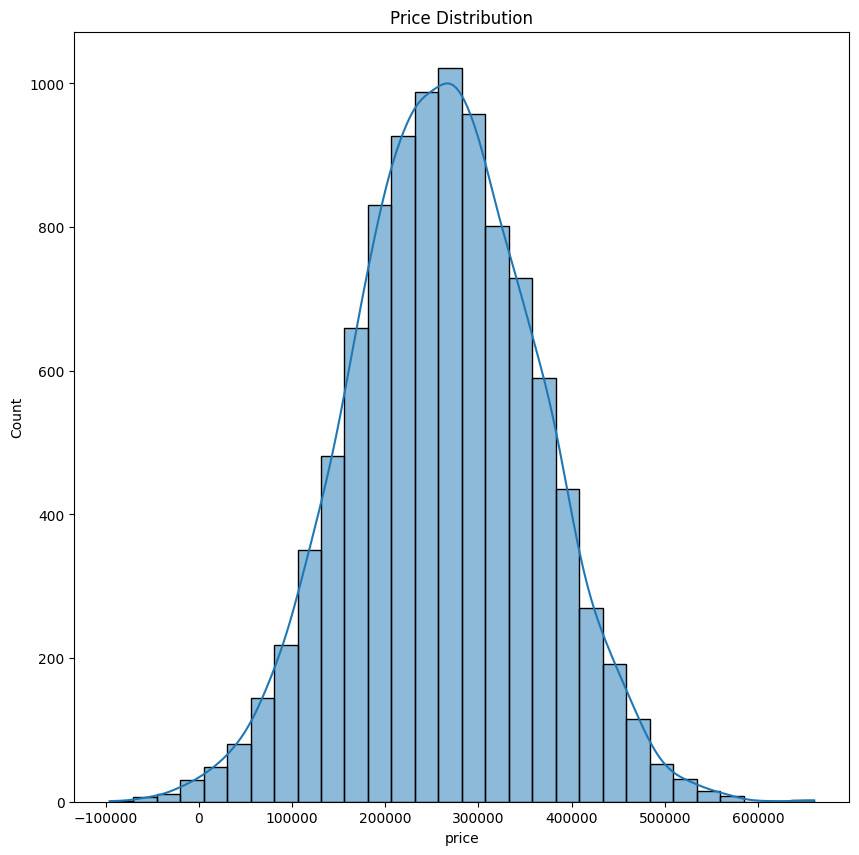

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x='price', bins = 30, kde = True)
plt.title('Price Distribution')
plt.show()

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_clean.isnull().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [ ]:
df_clean.drop_duplicates(inplace= True)
df_clean.dropna(inplace = True)

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

numeric_columns = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']
df_dummy_cleaned = df_clean.copy()

for col in numeric_columns:
    df_dummy_cleaned = remove_outliers_iqr(df_dummy_cleaned, col)

# View shape change
print(f"Original: {df_clean.shape[0]} rows → Cleaned: {df_dummy_cleaned.shape[0]} rows")

Original: 10000 rows → Cleaned: 9873 rows


In [ ]:
final = df_clean.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = final.drop('price', axis=1)
y = final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


In [ ]:
y_pred

array([316636.89860441, 245793.09538071, 222084.4079465 , ...,
       261253.08848688, 254935.74566457, 204914.72083005])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


0.960063695761787

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_Score =  1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2_Score

0.9599836229713344